In [19]:
# Load altair for visualizations
import altair as alt
alt.data_transformers.disable_max_rows()

# Load seaborn for visualizations
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")
import matplotlib.pyplot as plt

# Load duckdb, which lets us efficiently load large files
import duckdb

# Load pandas, which lets us manipulate dataframes
import pandas as pd

# Import jupysql Jupyter extension to create SQL cells
%load_ext sql

# Set configrations on jupysql to directly output data to Pandas and to simplify the output that is printed to the notebook.
%config SqlMagic.autopandas = True

%config SqlMagic.feedback = False
%config SqlMagic.displaycon = False

# Allow named parameters (python variables) in SQL cells
%config SqlMagic.named_parameters=True

# Connect jupysql to DuckDB using a SQLAlchemy-style connection string. Either connect to an in memory DuckDB, or a file backed db.
%sql duckdb:///:memory:

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [2]:
df_top_drg_codes_cost = pd.read_parquet('/Users/me/data/payless_health/top_drg_by_cost.parquet') 
billing_code_to_description = {billing_code: description for billing_code, description in df_top_drg_codes_cost[['billing_code', 'description']].values}

In [3]:
%%sql 
CREATE TABLE top_drg_codes_by_cost AS SELECT * FROM '/Users/me/data/payless_health/top_drg_by_cost.parquet';

,Success


In [4]:
%%sql 
SELECT * FROM top_drg_codes_by_cost 

,billing_code,description,count
0,871,SEPTICEMIA OR SEVERE SEPSIS WITHOUT MV >96 HOU...,201
1,885,PSYCHOSES,460
2,003,ECMO OR TRACHEOSTOMY WITH MV >96 HOURS OR PRIN...,20
3,621,O.R. PROCEDURES FOR OBESITY WITHOUT CC/MCC,197
4,807,VAGINAL DELIVERY WITHOUT STERILIZATION OR D&C ...,457
5,247,PERCUTANEOUS CARDIOVASCULAR PROCEDURES WITH DR...,112
6,004,TRACHEOSTOMY WITH MV >96 HOURS OR PRINCIPAL DI...,15
7,177,RESPIRATORY INFECTIONS AND INFLAMMATIONS WITH MCC,94
8,233,CORONARY BYPASS WITH CARDIAC CATHETERIZATION O...,16
9,853,INFECTIOUS AND PARASITIC DISEASES WITH O.R. PR...,37


In [5]:
%%sql 
CREATE TABLE lenox AS SELECT * FROM '/Users/me/data/payless_health/EIN_131624070-lenox-hill.parquet';

,Success


In [8]:
%%sql 
CREATE TABLE presbyterian AS SELECT * FROM '/Users/me/data/payless_health/EIN_133957095_newyork-presbyterian.parquet';

,Success


In [9]:
%%sql 
CREATE TABLE nyu_langone AS SELECT * FROM '/Users/me/data/payless_health/EIN_133971298_nyu-langone.parquet';

,Success


In [10]:
%%sql 
SELECT *, 'NYU Langone - Tisch' AS hospital FROM nyu_langone
INNER JOIN top_drg_codes_by_cost ON nyu_langone.billing_code = top_drg_codes_by_cost.billing_code


,billing_code,description,health_insurance_name,negotiated_rate,billing_code_2,description_2,count,hospital
0,003,ECMO OR TRACHEOSTOMY WITH MV >96 HOURS OR PRIN...,AETNA HMO,446187.58,003,ECMO OR TRACHEOSTOMY WITH MV >96 HOURS OR PRIN...,20,NYU Langone - Tisch
1,003,ECMO OR TRACHEOSTOMY WITH MV >96 HOURS OR PRIN...,AETNA INDEMNITY,100.00,003,ECMO OR TRACHEOSTOMY WITH MV >96 HOURS OR PRIN...,20,NYU Langone - Tisch
2,003,ECMO OR TRACHEOSTOMY WITH MV >96 HOURS OR PRIN...,BCBS GHI COMPOSITE,697815.68,003,ECMO OR TRACHEOSTOMY WITH MV >96 HOURS OR PRIN...,20,NYU Langone - Tisch
3,003,ECMO OR TRACHEOSTOMY WITH MV >96 HOURS OR PRIN...,BCBS HMO,685936.50,003,ECMO OR TRACHEOSTOMY WITH MV >96 HOURS OR PRIN...,20,NYU Langone - Tisch
4,003,ECMO OR TRACHEOSTOMY WITH MV >96 HOURS OR PRIN...,BCBS INDEMNITY,778764.08,003,ECMO OR TRACHEOSTOMY WITH MV >96 HOURS OR PRIN...,20,NYU Langone - Tisch
...,...,...,...,...,...,...,...,...
11244,621,Neonate bwt 2000-2499g w major anomaly,HEALTHFIRST BRONZE LEAF EXCHANGE,52119.66,621,O.R. PROCEDURES FOR OBESITY WITHOUT CC/MCC,197,NYU Langone - Tisch
11245,621,Neonate bwt 2000-2499g w major anomaly,HEALTHFIRST GREEN LEAF EXCHANGE,52119.66,621,O.R. PROCEDURES FOR OBESITY WITHOUT CC/MCC,197,NYU Langone - Tisch
11246,621,Neonate bwt 2000-2499g w major anomaly,HEALTHFIRST PLATINUM LEAF EXCHANGE,52119.66,621,O.R. PROCEDURES FOR OBESITY WITHOUT CC/MCC,197,NYU Langone - Tisch
11247,621,Neonate bwt 2000-2499g w major anomaly,HEALTHFIRST SILVER LEAF EXCHANGE,52119.66,621,O.R. PROCEDURES FOR OBESITY WITHOUT CC/MCC,197,NYU Langone - Tisch


In [11]:
%%sql
SELECT *, 'NewYork-Presbyterian' AS hospital FROM presbyterian
INNER JOIN top_drg_codes_by_cost ON presbyterian.billing_code = top_drg_codes_by_cost.billing_code


,billing_code,description,health_insurance_name,negotiated_rate,billing_code_2,description_2,count,hospital
0,177,RESPIRATORY INFECTIONS AND INFLAMMATIONS WITH MCC,Discounted Cash Price,145697.750000,177,RESPIRATORY INFECTIONS AND INFLAMMATIONS WITH MCC,94,NewYork-Presbyterian
1,177,RESPIRATORY INFECTIONS AND INFLAMMATIONS WITH MCC,Aetna,61541.824219,177,RESPIRATORY INFECTIONS AND INFLAMMATIONS WITH MCC,94,NewYork-Presbyterian
2,177,RESPIRATORY INFECTIONS AND INFLAMMATIONS WITH MCC,Cigna,70190.945312,177,RESPIRATORY INFECTIONS AND INFLAMMATIONS WITH MCC,94,NewYork-Presbyterian
3,177,RESPIRATORY INFECTIONS AND INFLAMMATIONS WITH MCC,Empire Blue Cross Blue Shield,70599.945312,177,RESPIRATORY INFECTIONS AND INFLAMMATIONS WITH MCC,94,NewYork-Presbyterian
4,177,RESPIRATORY INFECTIONS AND INFLAMMATIONS WITH MCC,Emblem Health,81699.898438,177,RESPIRATORY INFECTIONS AND INFLAMMATIONS WITH MCC,94,NewYork-Presbyterian
...,...,...,...,...,...,...,...,...
915,897,"ALCOHOL, DRUG ABUSE OR DEPENDENCE WITHOUT REHA...",First Health,32178.148438,897,"ALCOHOL, DRUG ABUSE OR DEPENDENCE WITHOUT REHA...",625,NewYork-Presbyterian
916,897,"ALCOHOL, DRUG ABUSE OR DEPENDENCE WITHOUT REHA...",Magnacare,32178.148438,897,"ALCOHOL, DRUG ABUSE OR DEPENDENCE WITHOUT REHA...",625,NewYork-Presbyterian
917,897,"ALCOHOL, DRUG ABUSE OR DEPENDENCE WITHOUT REHA...",Multiplan/Beechstreet/PHCS,32178.148438,897,"ALCOHOL, DRUG ABUSE OR DEPENDENCE WITHOUT REHA...",625,NewYork-Presbyterian
918,897,"ALCOHOL, DRUG ABUSE OR DEPENDENCE WITHOUT REHA...",QHM,32178.148438,897,"ALCOHOL, DRUG ABUSE OR DEPENDENCE WITHOUT REHA...",625,NewYork-Presbyterian


In [12]:
%%sql 
SELECT *, 'Northwell - Lenox Hill' AS hospital FROM lenox 
INNER JOIN top_drg_codes_by_cost ON lenox.billing_code = top_drg_codes_by_cost.billing_code

,billing_code,description,health_insurance_name,negotiated_rate,billing_code_2,description_2,count,hospital
0,790,EXTREME IMMATURITY OR RESPIRATORY DISTRESS SYN...,Empire Blue Access EPO,240532.0,790,EXTREME IMMATURITY OR RESPIRATORY DISTRESS SYN...,16,Northwell - Lenox Hill
1,790,EXTREME IMMATURITY OR RESPIRATORY DISTRESS SYN...,Empire Blue Access PPO,240532.0,790,EXTREME IMMATURITY OR RESPIRATORY DISTRESS SYN...,16,Northwell - Lenox Hill
2,790,EXTREME IMMATURITY OR RESPIRATORY DISTRESS SYN...,Empire Bronze EPO,207617.0,790,EXTREME IMMATURITY OR RESPIRATORY DISTRESS SYN...,16,Northwell - Lenox Hill
3,790,EXTREME IMMATURITY OR RESPIRATORY DISTRESS SYN...,Empire Bronze Link EPO,207617.0,790,EXTREME IMMATURITY OR RESPIRATORY DISTRESS SYN...,16,Northwell - Lenox Hill
4,790,EXTREME IMMATURITY OR RESPIRATORY DISTRESS SYN...,Empire Connection EPO,207617.0,790,EXTREME IMMATURITY OR RESPIRATORY DISTRESS SYN...,16,Northwell - Lenox Hill
...,...,...,...,...,...,...,...,...
7651,621,Neonate bwt 2000-2499g w major anomaly,Metroplus Child Health Plus,66326.0,621,O.R. PROCEDURES FOR OBESITY WITHOUT CC/MCC,197,Northwell - Lenox Hill
7652,621,Neonate bwt 2000-2499g w major anomaly,Metroplus HIV Special Needs Plan,66326.0,621,O.R. PROCEDURES FOR OBESITY WITHOUT CC/MCC,197,Northwell - Lenox Hill
7653,621,Neonate bwt 2000-2499g w major anomaly,Metroplus Medicaid,66326.0,621,O.R. PROCEDURES FOR OBESITY WITHOUT CC/MCC,197,Northwell - Lenox Hill
7654,621,Neonate bwt 2000-2499g w major anomaly,United - Essential 3&4,66326.0,621,O.R. PROCEDURES FOR OBESITY WITHOUT CC/MCC,197,Northwell - Lenox Hill


In [31]:
%%sql 
WITH lenox_joined AS (
SELECT *, 'Northwell - Lenox Hill' AS hospital FROM lenox 
INNER JOIN top_drg_codes_by_cost ON lenox.billing_code = top_drg_codes_by_cost.billing_code
),

presbyterian_joined AS (
SELECT *, 'NewYork-Presbyterian' AS hospital FROM presbyterian
INNER JOIN top_drg_codes_by_cost ON presbyterian.billing_code = top_drg_codes_by_cost.billing_code
),

-- mount_sinai_joined AS (
-- SELECT *, 'Mount Sinai' AS hospital FROM mount_sinai
-- INNER JOIN top_drg_codes_by_cost ON mount_sinai.billing_code = top_drg_codes_by_cost.billing_code
-- ),

nyu_langone_joined AS (
SELECT *, 'NYU Langone - Tisch' AS hospital FROM nyu_langone
INNER JOIN top_drg_codes_by_cost ON nyu_langone.billing_code = top_drg_codes_by_cost.billing_code
)

SELECT * FROM 
(SELECT * FROM lenox_joined
 UNION ALL
 SELECT * FROM presbyterian_joined
  UNION ALL
  -- SELECT * FROM mount_sinai_joined
  -- UNION ALL
  SELECT * FROM nyu_langone_joined) 
WHERE billing_code IN (SELECT billing_code FROM presbyterian_joined)
AND billing_code IN (SELECT billing_code FROM lenox_joined)
-- AND billing_code IN (SELECT billing_code FROM mount_sinai_joined)
AND billing_code IN (SELECT billing_code FROM nyu_langone_joined)

,billing_code,description,health_insurance_name,negotiated_rate,billing_code:1,description:1,count,hospital
0,790,EXTREME IMMATURITY OR RESPIRATORY DISTRESS SYN...,Empire Blue Access EPO,240532.000000,790,EXTREME IMMATURITY OR RESPIRATORY DISTRESS SYN...,16,Northwell - Lenox Hill
1,790,EXTREME IMMATURITY OR RESPIRATORY DISTRESS SYN...,Empire Blue Access PPO,240532.000000,790,EXTREME IMMATURITY OR RESPIRATORY DISTRESS SYN...,16,Northwell - Lenox Hill
2,790,EXTREME IMMATURITY OR RESPIRATORY DISTRESS SYN...,Empire Bronze EPO,207617.000000,790,EXTREME IMMATURITY OR RESPIRATORY DISTRESS SYN...,16,Northwell - Lenox Hill
3,790,EXTREME IMMATURITY OR RESPIRATORY DISTRESS SYN...,Empire Bronze Link EPO,207617.000000,790,EXTREME IMMATURITY OR RESPIRATORY DISTRESS SYN...,16,Northwell - Lenox Hill
4,790,EXTREME IMMATURITY OR RESPIRATORY DISTRESS SYN...,Empire Connection EPO,207617.000000,790,EXTREME IMMATURITY OR RESPIRATORY DISTRESS SYN...,16,Northwell - Lenox Hill
...,...,...,...,...,...,...,...,...
15840,897,"ALCOHOL, DRUG ABUSE OR DEPENDENCE WITHOUT REHA...",First Health,32178.148438,897,"ALCOHOL, DRUG ABUSE OR DEPENDENCE WITHOUT REHA...",625,NewYork-Presbyterian
15841,897,"ALCOHOL, DRUG ABUSE OR DEPENDENCE WITHOUT REHA...",Magnacare,32178.148438,897,"ALCOHOL, DRUG ABUSE OR DEPENDENCE WITHOUT REHA...",625,NewYork-Presbyterian
15842,897,"ALCOHOL, DRUG ABUSE OR DEPENDENCE WITHOUT REHA...",Multiplan/Beechstreet/PHCS,32178.148438,897,"ALCOHOL, DRUG ABUSE OR DEPENDENCE WITHOUT REHA...",625,NewYork-Presbyterian
15843,897,"ALCOHOL, DRUG ABUSE OR DEPENDENCE WITHOUT REHA...",QHM,32178.148438,897,"ALCOHOL, DRUG ABUSE OR DEPENDENCE WITHOUT REHA...",625,NewYork-Presbyterian


In [14]:
df = _

In [16]:
billing_code = '790'
alt.Chart(df[df['billing_code'] == billing_code]).mark_boxplot().encode(
  alt.X("hospital:N", title="Hospital Name", axis=alt.Axis(labelAngle=-45)),
  alt.Y("negotiated_rate:Q", axis=alt.Axis(format='$.0f'), title=f"Price Listed by Hospital (Across Health Insurance Products)").scale(zero=False),
).properties(
title=[f"Diagnosis Related Group (DRG) code {billing_code}:",
  f"{billing_code_to_description[billing_code].split(',')[0].lower().capitalize()}"]
).display()

alt.Chart(...)

In [17]:
health_insurance_names = {
  'medicare': ['medicare', 'mdcr', 'mediblue'],
  'medicaid': ['medicaid', 'mdcd'],
  'aetna': ['aetna'],
  'empire': ['empire', 'blue cross', 'bcbs'],
  'healthfirst': ['healthfirst'],
  'oxford': ['oxford'],
  'united': ['united'],
  'cigna': ['cigna'],
  'healthnet': ['healthnet'],
  'humana': ['humana'],
  'emblem': ['emblem'],
  'metroplus': ['metroplus'],
  'mvp': ['mvp'],
  '32bj': ['32bj'],
  'fidelis': ['fidelis'],
  'affinity': ['affinity'],
  'amida': ['amida'],
  'centerlight': ['centerlight'],
  'elderplan': ['elderplan'],
  'vnsny': ['vnsny'],
  'wellcare': ['wellcare'],
  '1199': ['1199', '1199seiu'],
  '1199seiu': ['1199seiu'],  
}
df.health_insurance_name.str.contains('|'.join(health_insurance_names['empire']), case=False) & ~df.hospital.str.contains('|'.join(health_insurance_names['medicare']), case=False) & ~df.hospital.str.contains('|'.join(health_insurance_names['medicaid']), case=False)

0         True
1         True
2         True
3         True
4         True
         ...  
15840    False
15841    False
15842    False
15843    False
15844    False
Length: 15845, dtype: bool

In [18]:
df[df.health_insurance_name.str.contains('|'.join(health_insurance_names['aetna']), case=False) & ~df.hospital.str.contains('|'.join(health_insurance_names['medicare']), case=False) & ~df.hospital.str.contains('|'.join(health_insurance_names['medicaid']), case=False)].hospital.value_counts()

Northwell - Lenox Hill    552
NYU Langone - Tisch       276
NewYork-Presbyterian       46
Name: hospital, dtype: int64

In [22]:
df.loc[df.health_insurance_name.str.contains('|'.join(health_insurance_names['medicare']), case=False), 'insurance_group'] = 'Medicare'
df.loc[df.health_insurance_name.str.contains('|'.join(health_insurance_names['medicaid']), case=False), 'insurance_group'] = 'Medicaid'
df.loc[df.health_insurance_name.str.contains('|'.join(health_insurance_names['aetna']), case=False) & ~df.hospital.str.contains('|'.join(health_insurance_names['medicare']), case=False) & ~df.hospital.str.contains('|'.join(health_insurance_names['medicaid']), case=False), 'insurance_group'] = 'Aetna'
df.loc[df.health_insurance_name.str.contains('|'.join(health_insurance_names['united']), case=False) & ~df.hospital.str.contains('|'.join(health_insurance_names['medicare']), case=False) & ~df.hospital.str.contains('|'.join(health_insurance_names['medicaid']), case=False), 'insurance_group'] = 'United'
df.loc[df.health_insurance_name.str.contains('|'.join(health_insurance_names['cigna']), case=False) & ~df.hospital.str.contains('|'.join(health_insurance_names['medicare']), case=False) & ~df.hospital.str.contains('|'.join(health_insurance_names['medicaid']), case=False), 'insurance_group'] = 'Cigna'
df.loc[df.health_insurance_name.str.contains('|'.join(health_insurance_names['empire']), case=False) & ~df.hospital.str.contains('|'.join(health_insurance_names['medicare']), case=False) & ~df.hospital.str.contains('|'.join(health_insurance_names['medicaid']), case=False), 'insurance_group'] = 'Empire Blue Cross'
df.loc[df.health_insurance_name.str.contains('|'.join(health_insurance_names['humana']), case=False) & ~df.hospital.str.contains('|'.join(health_insurance_names['medicare']), case=False) & ~df.hospital.str.contains('|'.join(health_insurance_names['medicaid']), case=False), 'insurance_group'] = 'Humana'


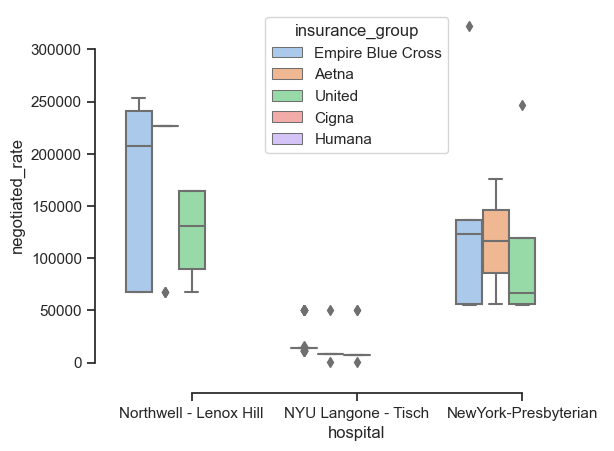

In [25]:
# Draw a nested boxplot to show bills by day and time
billing_code = '790'
sns.boxplot(x="hospital", y="negotiated_rate",
            hue="insurance_group", 
            hue_order=["Empire Blue Cross", "Aetna", "United", "Cigna", "Humana"],
            #palette=["m", "g"],
            data=df[df['billing_code'] == billing_code])
sns.despine(offset=10, trim=True)

# Plot DRG code by insurer

871
hospital                insurance_group  
NYU Langone - Tisch     Empire Blue Cross    52
                        Medicare             31
                        United               15
                        Aetna                12
                        Medicaid              1
NewYork-Presbyterian    Medicaid              7
                        Medicare              6
                        Empire Blue Cross     5
                        United                4
                        Aetna                 2
Northwell - Lenox Hill  Empire Blue Cross    33
                        Aetna                24
                        Medicare              9
                        United                4
                        Medicaid              1
Name: insurance_group, dtype: int64


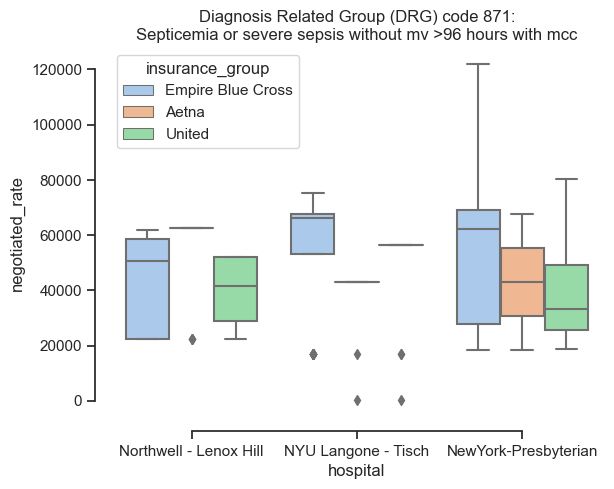

885
hospital                insurance_group  
NYU Langone - Tisch     Empire Blue Cross    52
                        Medicare             31
                        United               15
                        Aetna                12
                        Medicaid              1
NewYork-Presbyterian    Medicaid              7
                        Medicare              6
                        Empire Blue Cross     5
                        United                4
                        Aetna                 2
Northwell - Lenox Hill  Empire Blue Cross    33
                        Aetna                24
                        Medicare              9
                        United                4
                        Medicaid              1
Name: insurance_group, dtype: int64


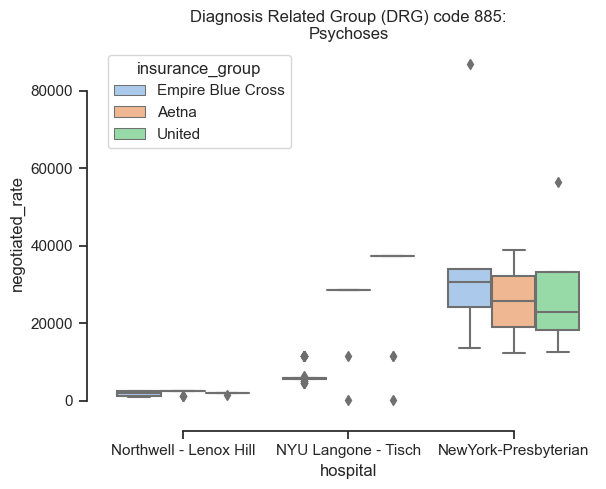

003
621
hospital                insurance_group  
NYU Langone - Tisch     Empire Blue Cross    136
                        Medicaid              49
                        Medicare              31
                        United                15
                        Aetna                 12
NewYork-Presbyterian    Medicaid               7
                        Medicare               6
                        Empire Blue Cross      5
                        United                 4
                        Aetna                  2
Northwell - Lenox Hill  Empire Blue Cross     53
                        Aetna                 24
                        Medicaid              21
                        United                16
                        Medicare               9
Name: insurance_group, dtype: int64


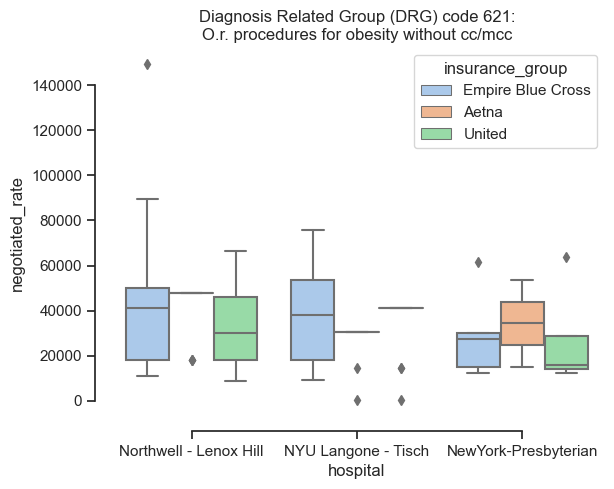

807
hospital                insurance_group  
NYU Langone - Tisch     Empire Blue Cross    52
                        Medicare             31
                        United               15
                        Aetna                12
                        Medicaid              1
NewYork-Presbyterian    Medicaid              7
                        Medicare              6
                        Empire Blue Cross     5
                        United                4
                        Aetna                 2
Northwell - Lenox Hill  Empire Blue Cross    33
                        Aetna                24
                        Medicare              9
                        United                4
                        Medicaid              1
Name: insurance_group, dtype: int64


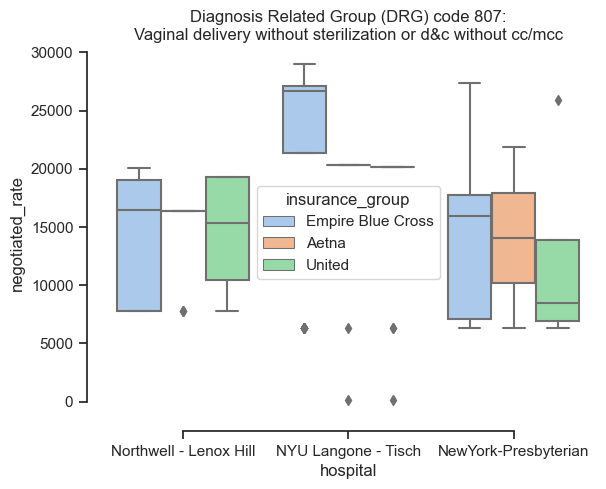

247
hospital                insurance_group  
NYU Langone - Tisch     Empire Blue Cross    136
                        Medicaid              49
                        Medicare              31
                        United                15
                        Aetna                 12
NewYork-Presbyterian    Medicaid               7
                        Medicare               6
                        Empire Blue Cross      5
                        United                 4
                        Aetna                  2
Northwell - Lenox Hill  Empire Blue Cross     53
                        Aetna                 24
                        Medicaid              21
                        United                16
                        Medicare               9
Name: insurance_group, dtype: int64


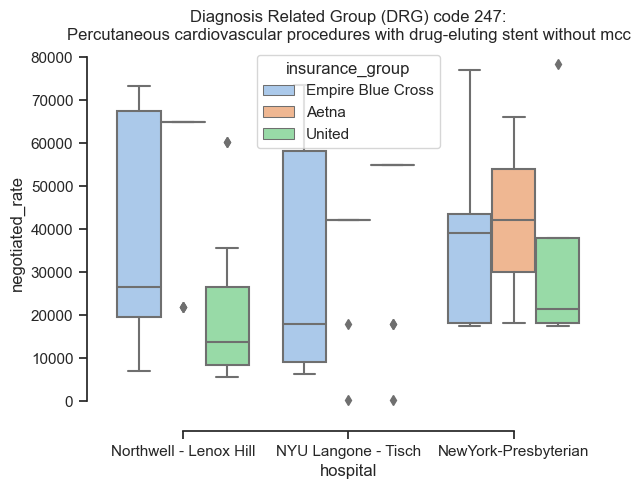

004
177
hospital                insurance_group  
NYU Langone - Tisch     Empire Blue Cross    136
                        Medicaid              49
                        Medicare              31
                        United                15
                        Aetna                 12
NewYork-Presbyterian    Medicaid               7
                        Medicare               6
                        Empire Blue Cross      5
                        United                 4
                        Aetna                  2
Northwell - Lenox Hill  Empire Blue Cross     53
                        Aetna                 24
                        Medicaid              21
                        United                16
                        Medicare               9
Name: insurance_group, dtype: int64


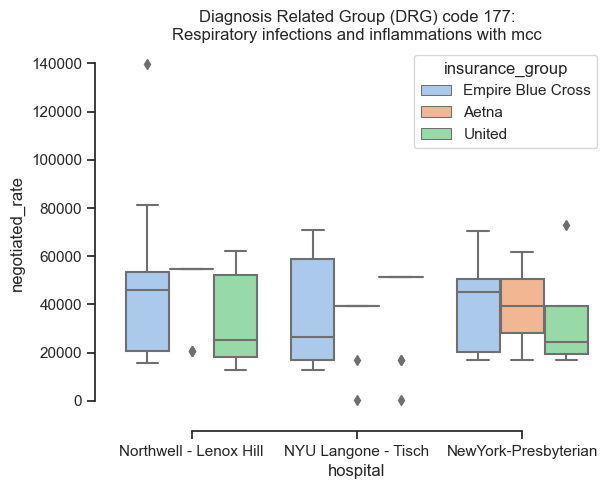

233
hospital                insurance_group  
NYU Langone - Tisch     Empire Blue Cross    52
                        Medicare             31
                        United               15
                        Aetna                12
                        Medicaid              1
NewYork-Presbyterian    Medicaid              7
                        Medicare              6
                        Empire Blue Cross     5
                        United                4
                        Aetna                 2
Northwell - Lenox Hill  Empire Blue Cross    33
                        Aetna                24
                        Medicare              9
                        United                4
                        Medicaid              1
Name: insurance_group, dtype: int64


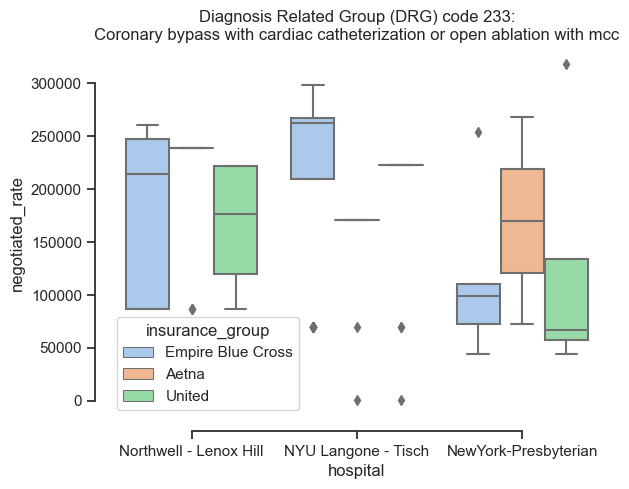

853
hospital                insurance_group  
NYU Langone - Tisch     Empire Blue Cross    52
                        Medicare             31
                        United               15
                        Aetna                12
                        Medicaid              1
NewYork-Presbyterian    Medicaid              7
                        Medicare              6
                        Empire Blue Cross     5
                        United                4
                        Aetna                 2
Northwell - Lenox Hill  Empire Blue Cross    33
                        Aetna                24
                        Medicare              9
                        United                4
                        Medicaid              1
Name: insurance_group, dtype: int64


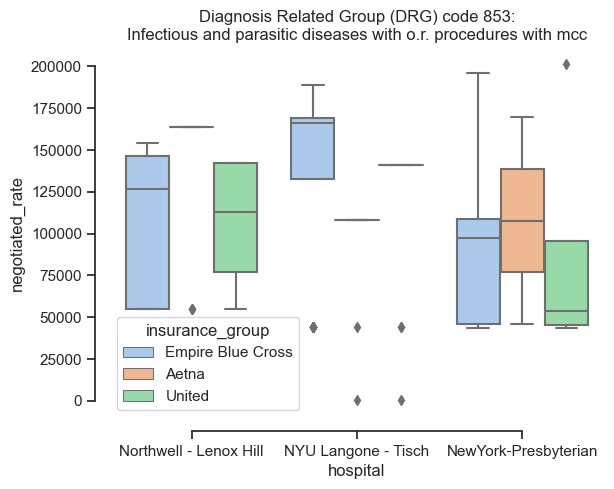

470
hospital                insurance_group  
NYU Langone - Tisch     Empire Blue Cross    136
                        Medicaid              49
                        Medicare              31
                        United                15
                        Aetna                 12
NewYork-Presbyterian    Medicaid               7
                        Medicare               6
                        Empire Blue Cross      5
                        United                 4
                        Aetna                  2
Northwell - Lenox Hill  Empire Blue Cross     53
                        Aetna                 24
                        Medicaid              21
                        United                16
                        Medicare               9
Name: insurance_group, dtype: int64


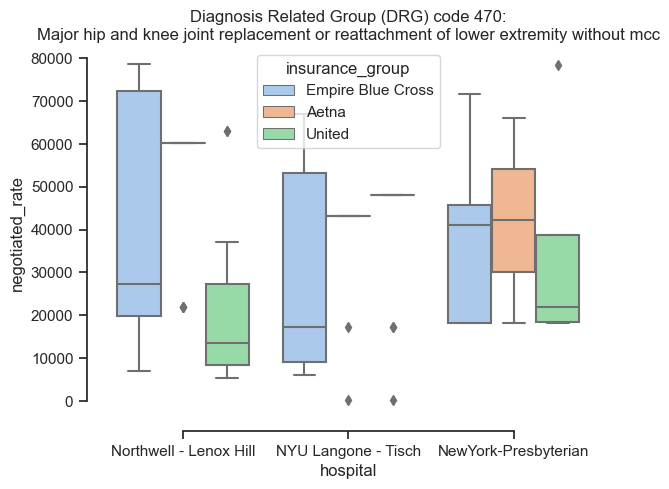

329
hospital                insurance_group  
NYU Langone - Tisch     Empire Blue Cross    52
                        Medicare             31
                        United               15
                        Aetna                12
                        Medicaid              1
NewYork-Presbyterian    Medicaid              7
                        Medicare              6
                        Empire Blue Cross     5
                        United                4
                        Aetna                 2
Northwell - Lenox Hill  Empire Blue Cross    33
                        Aetna                24
                        Medicare              9
                        United                4
                        Medicaid              1
Name: insurance_group, dtype: int64


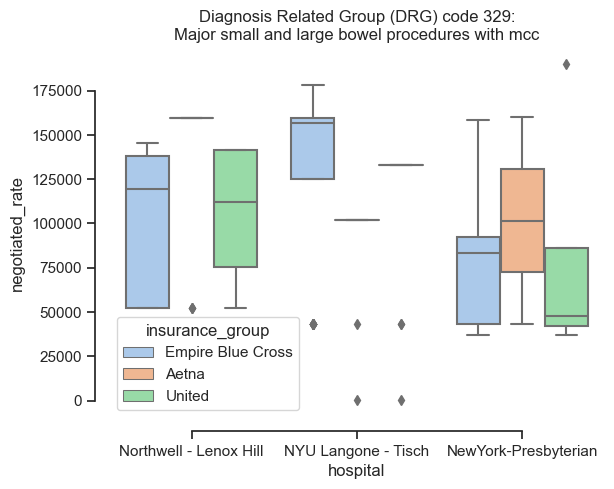

025
219
hospital                insurance_group  
NYU Langone - Tisch     Empire Blue Cross    52
                        Medicare             31
                        United               15
                        Aetna                12
                        Medicaid              1
NewYork-Presbyterian    Medicaid              7
                        Medicare              6
                        Empire Blue Cross     5
                        United                4
                        Aetna                 2
Northwell - Lenox Hill  Empire Blue Cross    33
                        Aetna                24
                        Medicare              9
                        United                4
                        Medicaid              1
Name: insurance_group, dtype: int64


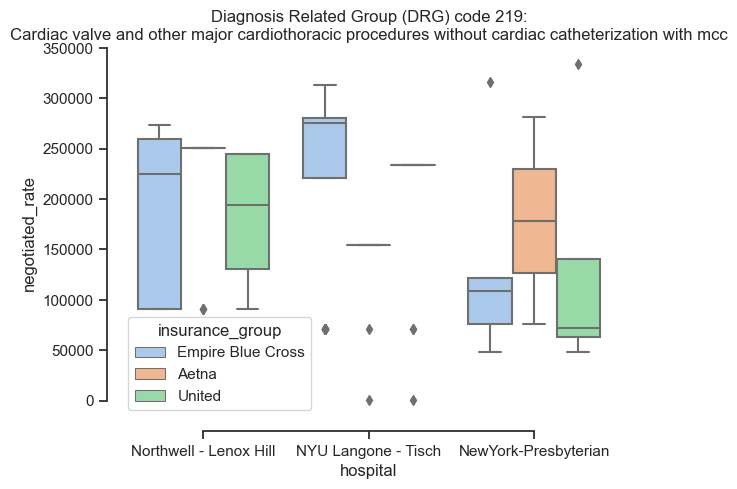

790
hospital                insurance_group  
NYU Langone - Tisch     Empire Blue Cross    52
                        Medicare             31
                        United               15
                        Aetna                12
                        Medicaid              1
NewYork-Presbyterian    Medicaid              7
                        Medicare              6
                        Empire Blue Cross     5
                        United                4
                        Aetna                 2
Northwell - Lenox Hill  Empire Blue Cross    33
                        Aetna                24
                        Medicare              9
                        United                4
                        Medicaid              1
Name: insurance_group, dtype: int64


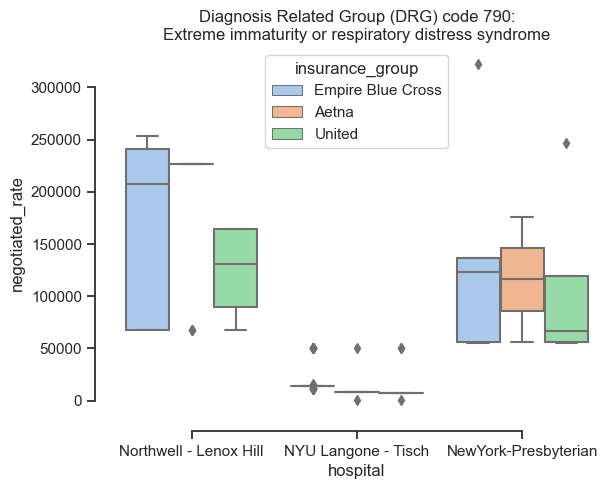

788
hospital                insurance_group  
NYU Langone - Tisch     Empire Blue Cross    52
                        Medicare             31
                        United               15
                        Aetna                12
                        Medicaid              1
NewYork-Presbyterian    Medicaid              7
                        Medicare              6
                        Empire Blue Cross     5
                        United                4
                        Aetna                 2
Northwell - Lenox Hill  Empire Blue Cross    33
                        Aetna                24
                        Medicare              9
                        United                4
                        Medicaid              1
Name: insurance_group, dtype: int64


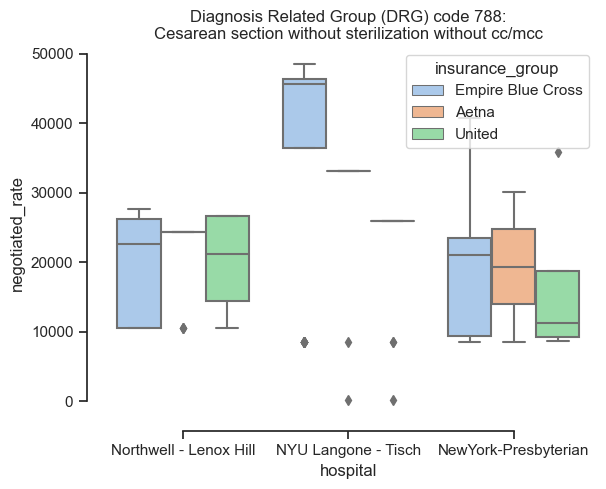

246
hospital                insurance_group  
NYU Langone - Tisch     Empire Blue Cross    136
                        Medicaid              49
                        Medicare              31
                        United                15
                        Aetna                 12
NewYork-Presbyterian    Medicaid               7
                        Medicare               6
                        Empire Blue Cross      5
                        United                 4
                        Aetna                  2
Northwell - Lenox Hill  Empire Blue Cross     53
                        Aetna                 24
                        Medicaid              21
                        United                16
                        Medicare               9
Name: insurance_group, dtype: int64


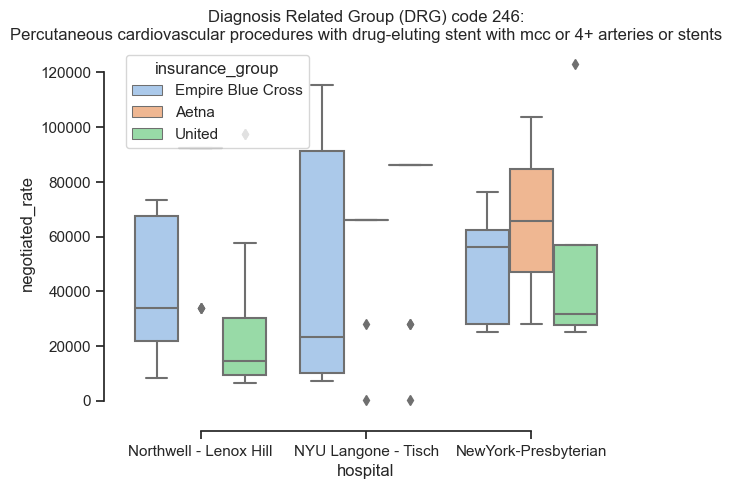

291
hospital                insurance_group  
NYU Langone - Tisch     Empire Blue Cross    52
                        Medicare             31
                        United               15
                        Aetna                12
                        Medicaid              1
NewYork-Presbyterian    Medicaid              7
                        Medicare              6
                        Empire Blue Cross     5
                        United                4
                        Aetna                 2
Northwell - Lenox Hill  Empire Blue Cross    33
                        Aetna                24
                        Medicare              9
                        United                4
                        Medicaid              1
Name: insurance_group, dtype: int64


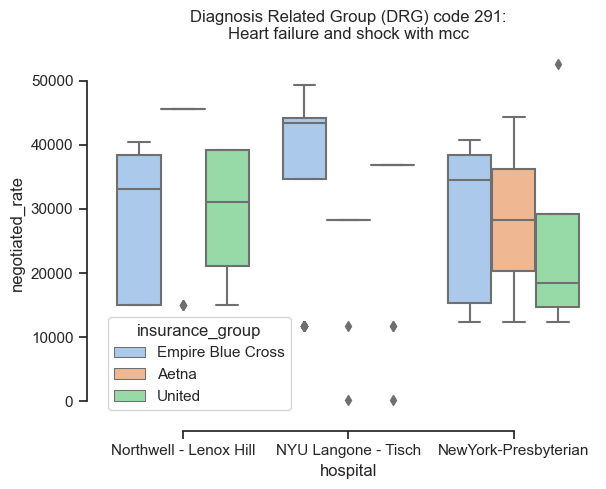

330
hospital                insurance_group  
NYU Langone - Tisch     Empire Blue Cross    52
                        Medicare             31
                        United               15
                        Aetna                12
                        Medicaid              1
NewYork-Presbyterian    Medicaid              7
                        Medicare              6
                        Empire Blue Cross     5
                        United                4
                        Aetna                 2
Northwell - Lenox Hill  Empire Blue Cross    33
                        Aetna                24
                        Medicare              9
                        United                4
                        Medicaid              1
Name: insurance_group, dtype: int64


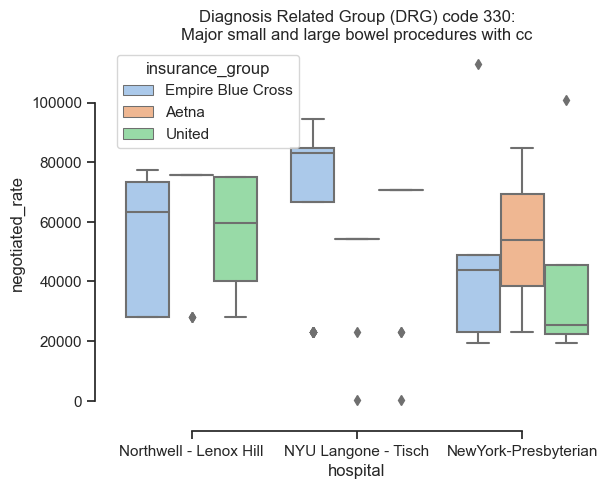

460
hospital                insurance_group  
NYU Langone - Tisch     Empire Blue Cross    52
                        Medicare             31
                        United               15
                        Aetna                12
                        Medicaid              1
NewYork-Presbyterian    Medicaid              7
                        Medicare              6
                        Empire Blue Cross     5
                        United                4
                        Aetna                 2
Northwell - Lenox Hill  Empire Blue Cross    53
                        Aetna                24
                        Medicaid             21
                        United               16
                        Medicare              9
Name: insurance_group, dtype: int64


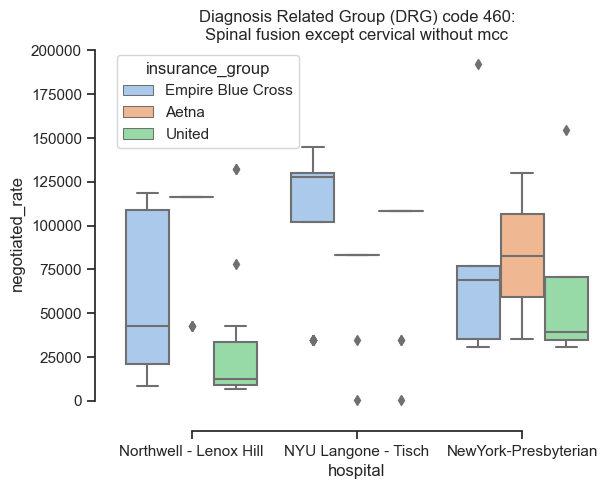

897
hospital                insurance_group  
NYU Langone - Tisch     Empire Blue Cross    52
                        Medicare             31
                        United               15
                        Aetna                12
                        Medicaid              1
NewYork-Presbyterian    Medicaid              7
                        Medicare              6
                        Empire Blue Cross     5
                        United                4
                        Aetna                 2
Northwell - Lenox Hill  Empire Blue Cross    33
                        Aetna                24
                        Medicare              9
                        United                4
                        Medicaid              1
Name: insurance_group, dtype: int64


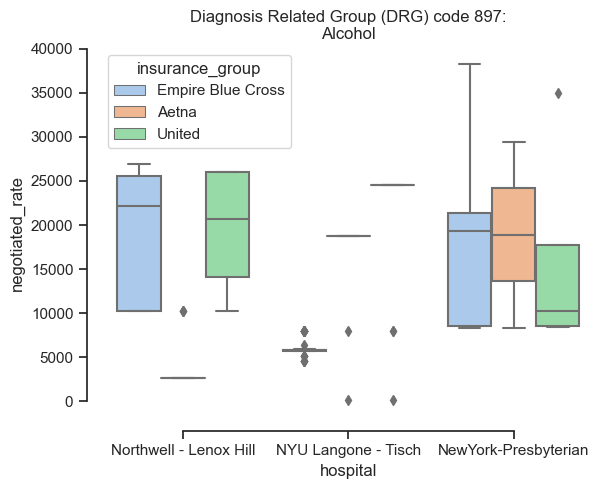

787
hospital                insurance_group  
NYU Langone - Tisch     Empire Blue Cross    52
                        Medicare             31
                        United               15
                        Aetna                12
                        Medicaid              1
NewYork-Presbyterian    Medicaid              7
                        Medicare              6
                        Empire Blue Cross     5
                        United                4
                        Aetna                 2
Northwell - Lenox Hill  Empire Blue Cross    33
                        Aetna                24
                        Medicare              9
                        United                4
                        Medicaid              1
Name: insurance_group, dtype: int64


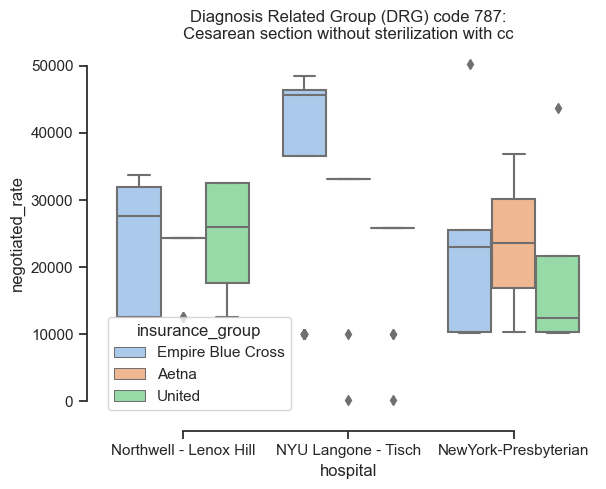

023
392
hospital                insurance_group  
NYU Langone - Tisch     Empire Blue Cross    52
                        Medicare             31
                        United               15
                        Aetna                12
                        Medicaid              1
NewYork-Presbyterian    Medicaid              7
                        Medicare              6
                        Empire Blue Cross     5
                        United                4
                        Aetna                 2
Northwell - Lenox Hill  Empire Blue Cross    33
                        Aetna                24
                        Medicare              9
                        United                4
                        Medicaid              1
Name: insurance_group, dtype: int64


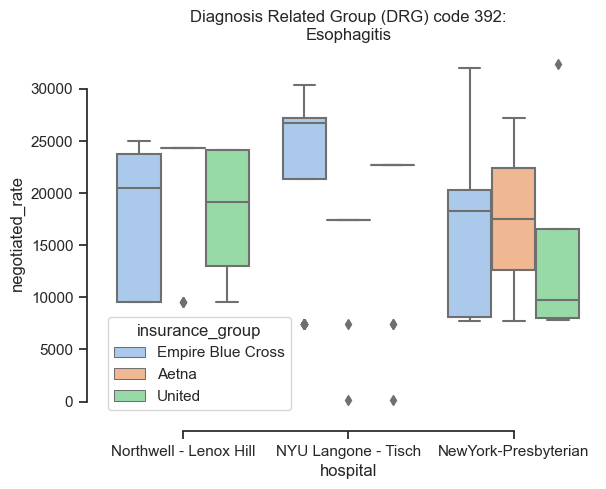

270
hospital                insurance_group  
NYU Langone - Tisch     Empire Blue Cross    52
                        Medicare             31
                        United               15
                        Aetna                12
                        Medicaid              1
NewYork-Presbyterian    Medicaid              7
                        Medicare              6
                        Empire Blue Cross     5
                        United                4
                        Aetna                 2
Northwell - Lenox Hill  Empire Blue Cross    33
                        Aetna                24
                        Medicare              9
                        United                4
                        Medicaid              1
Name: insurance_group, dtype: int64


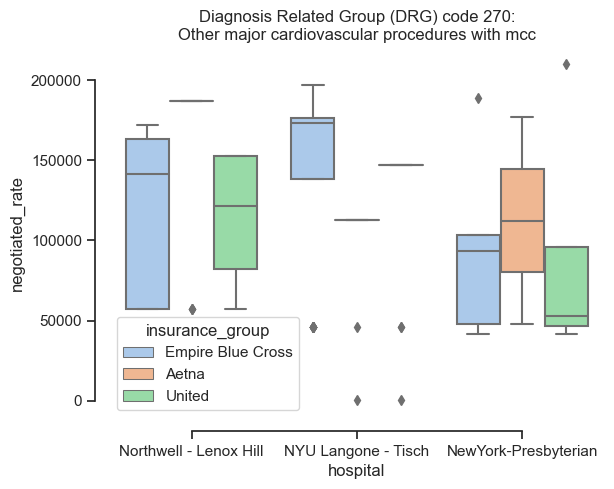

872
hospital                insurance_group  
NYU Langone - Tisch     Empire Blue Cross    52
                        Medicare             31
                        United               15
                        Aetna                12
                        Medicaid              1
NewYork-Presbyterian    Medicaid              7
                        Medicare              6
                        Empire Blue Cross     5
                        United                4
                        Aetna                 2
Northwell - Lenox Hill  Empire Blue Cross    33
                        Aetna                24
                        Medicare              9
                        United                4
                        Medicaid              1
Name: insurance_group, dtype: int64


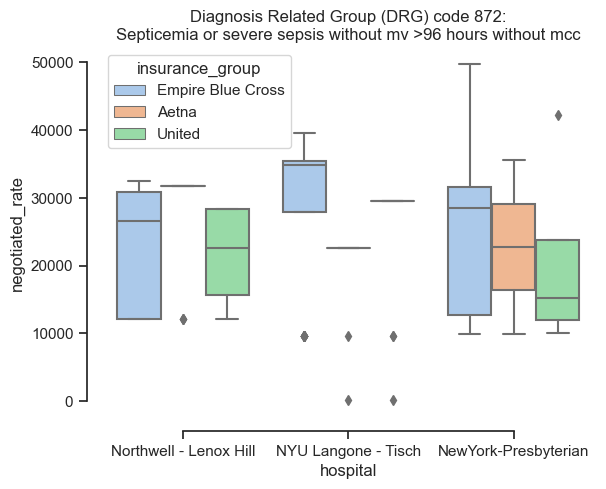

454
hospital                insurance_group  
NYU Langone - Tisch     Empire Blue Cross    52
                        Medicare             31
                        United               15
                        Aetna                12
                        Medicaid              1
NewYork-Presbyterian    Medicaid              7
                        Medicare              6
                        Empire Blue Cross     5
                        United                4
                        Aetna                 2
Northwell - Lenox Hill  Empire Blue Cross    33
                        Aetna                24
                        Medicare              9
                        United                4
                        Medicaid              1
Name: insurance_group, dtype: int64


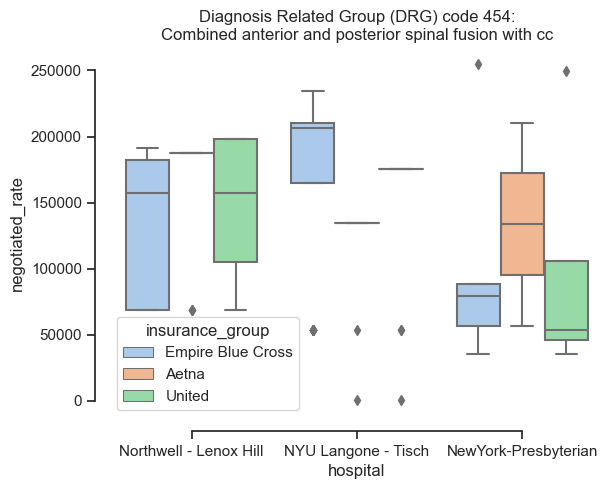

In [32]:
for billing_code in df_top_drg_codes_cost['billing_code']:
    print(billing_code)
    if billing_code in df['billing_code'].values:
      print(df[df['billing_code'] == billing_code].groupby('hospital').insurance_group.value_counts())
      sns.boxplot(x="hospital", y="negotiated_rate",
            hue="insurance_group", 
            hue_order=["Empire Blue Cross", "Aetna", "United"],
            #palette=["m", "g"],
            data=df[df['billing_code'] == billing_code]).set(title=f"Diagnosis Related Group (DRG) code {billing_code}:\n{billing_code_to_description[billing_code].split(',')[0].lower().capitalize()}")
      sns.despine(offset=10, trim=True)
      plt.show()
      

# Plot estimated spend

In [33]:
df['estimated_spend'] = df['negotiated_rate'] * df['count']

In [34]:
import matplotlib.ticker as ticker

# Create a custom formatter function
def format_ticks(value, pos):
    if value >= 1e6:
        return f'{value*1e-6:.0f}M'
    elif value >= 1e3:
        return f'{value*1e-3:.0f}K'
    else:
        return f'{value}'

# Create a FuncFormatter object
formatter = ticker.FuncFormatter(format_ticks)

871
hospital                insurance_group  
NYU Langone - Tisch     Empire Blue Cross    52
                        Medicare             31
                        United               15
                        Aetna                12
                        Medicaid              1
NewYork-Presbyterian    Medicaid              7
                        Medicare              6
                        Empire Blue Cross     5
                        United                4
                        Aetna                 2
Northwell - Lenox Hill  Empire Blue Cross    33
                        Aetna                24
                        Medicare              9
                        United                4
                        Medicaid              1
Name: insurance_group, dtype: int64


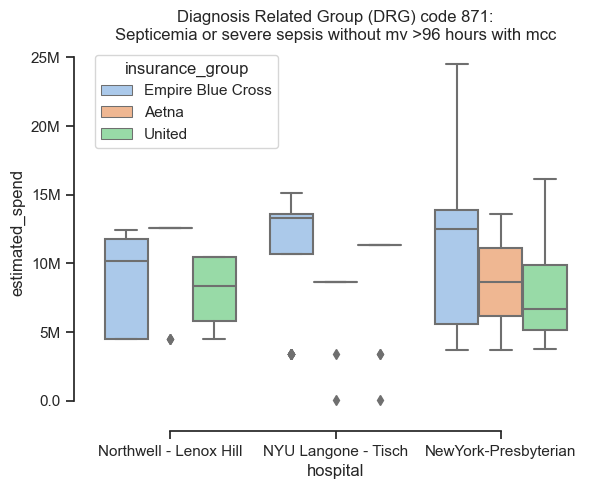

885
hospital                insurance_group  
NYU Langone - Tisch     Empire Blue Cross    52
                        Medicare             31
                        United               15
                        Aetna                12
                        Medicaid              1
NewYork-Presbyterian    Medicaid              7
                        Medicare              6
                        Empire Blue Cross     5
                        United                4
                        Aetna                 2
Northwell - Lenox Hill  Empire Blue Cross    33
                        Aetna                24
                        Medicare              9
                        United                4
                        Medicaid              1
Name: insurance_group, dtype: int64


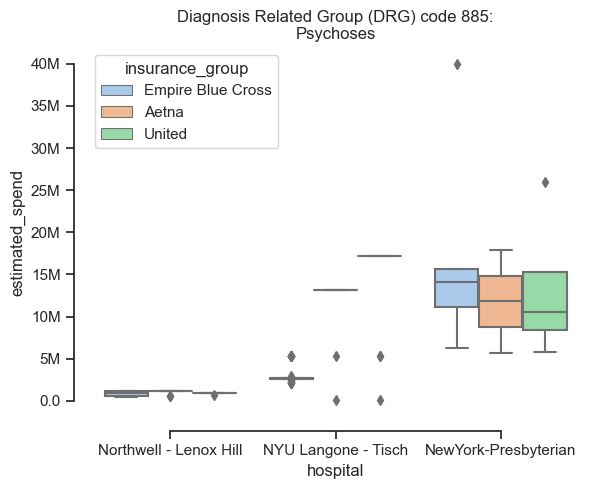

003
621
hospital                insurance_group  
NYU Langone - Tisch     Empire Blue Cross    136
                        Medicaid              49
                        Medicare              31
                        United                15
                        Aetna                 12
NewYork-Presbyterian    Medicaid               7
                        Medicare               6
                        Empire Blue Cross      5
                        United                 4
                        Aetna                  2
Northwell - Lenox Hill  Empire Blue Cross     53
                        Aetna                 24
                        Medicaid              21
                        United                16
                        Medicare               9
Name: insurance_group, dtype: int64


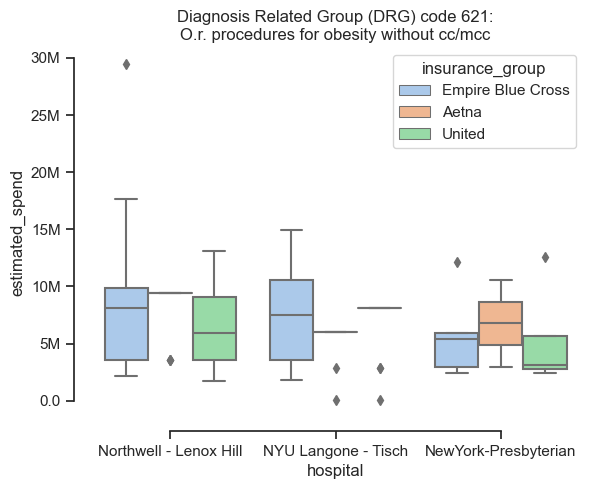

807
hospital                insurance_group  
NYU Langone - Tisch     Empire Blue Cross    52
                        Medicare             31
                        United               15
                        Aetna                12
                        Medicaid              1
NewYork-Presbyterian    Medicaid              7
                        Medicare              6
                        Empire Blue Cross     5
                        United                4
                        Aetna                 2
Northwell - Lenox Hill  Empire Blue Cross    33
                        Aetna                24
                        Medicare              9
                        United                4
                        Medicaid              1
Name: insurance_group, dtype: int64


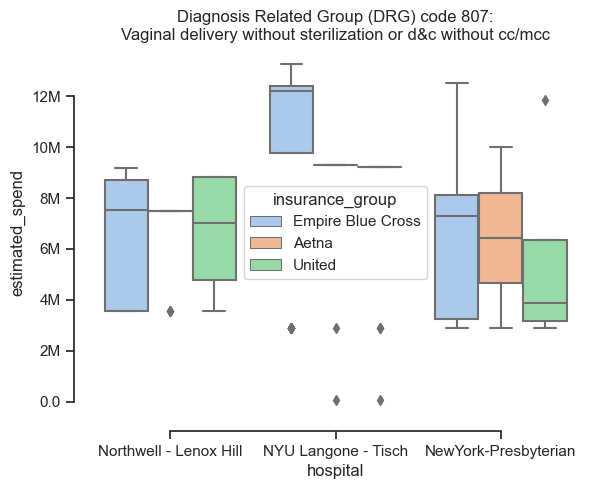

247
hospital                insurance_group  
NYU Langone - Tisch     Empire Blue Cross    136
                        Medicaid              49
                        Medicare              31
                        United                15
                        Aetna                 12
NewYork-Presbyterian    Medicaid               7
                        Medicare               6
                        Empire Blue Cross      5
                        United                 4
                        Aetna                  2
Northwell - Lenox Hill  Empire Blue Cross     53
                        Aetna                 24
                        Medicaid              21
                        United                16
                        Medicare               9
Name: insurance_group, dtype: int64


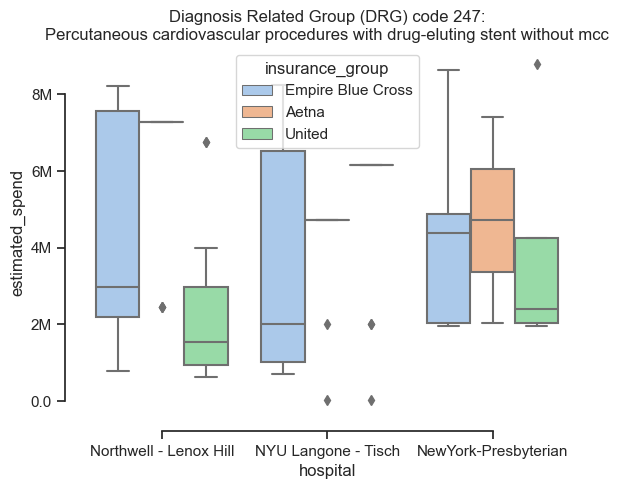

004
177
hospital                insurance_group  
NYU Langone - Tisch     Empire Blue Cross    136
                        Medicaid              49
                        Medicare              31
                        United                15
                        Aetna                 12
NewYork-Presbyterian    Medicaid               7
                        Medicare               6
                        Empire Blue Cross      5
                        United                 4
                        Aetna                  2
Northwell - Lenox Hill  Empire Blue Cross     53
                        Aetna                 24
                        Medicaid              21
                        United                16
                        Medicare               9
Name: insurance_group, dtype: int64


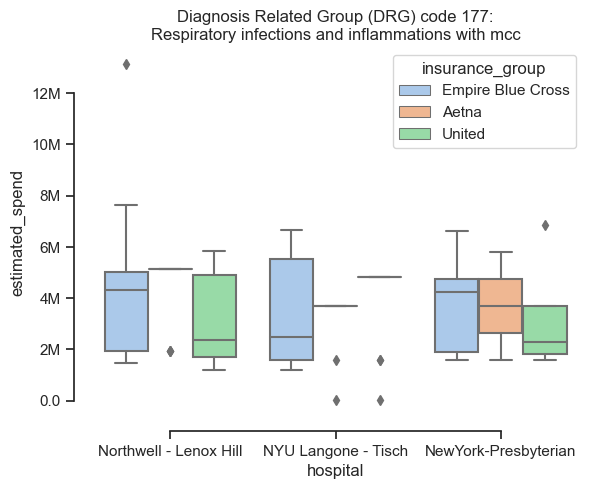

233
hospital                insurance_group  
NYU Langone - Tisch     Empire Blue Cross    52
                        Medicare             31
                        United               15
                        Aetna                12
                        Medicaid              1
NewYork-Presbyterian    Medicaid              7
                        Medicare              6
                        Empire Blue Cross     5
                        United                4
                        Aetna                 2
Northwell - Lenox Hill  Empire Blue Cross    33
                        Aetna                24
                        Medicare              9
                        United                4
                        Medicaid              1
Name: insurance_group, dtype: int64


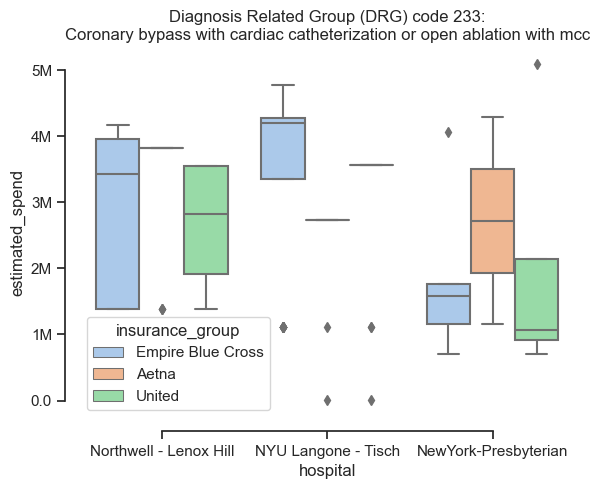

853
hospital                insurance_group  
NYU Langone - Tisch     Empire Blue Cross    52
                        Medicare             31
                        United               15
                        Aetna                12
                        Medicaid              1
NewYork-Presbyterian    Medicaid              7
                        Medicare              6
                        Empire Blue Cross     5
                        United                4
                        Aetna                 2
Northwell - Lenox Hill  Empire Blue Cross    33
                        Aetna                24
                        Medicare              9
                        United                4
                        Medicaid              1
Name: insurance_group, dtype: int64


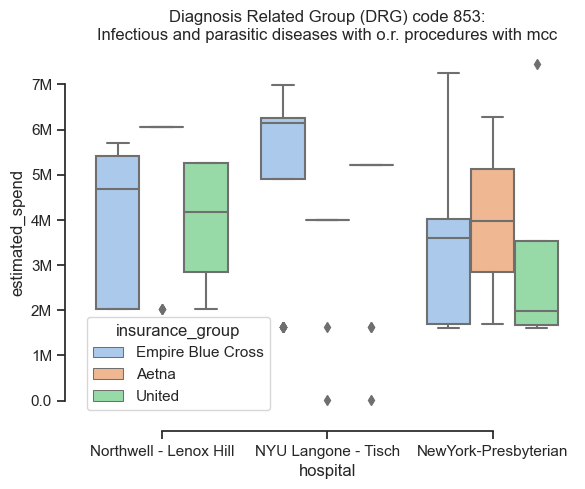

470
hospital                insurance_group  
NYU Langone - Tisch     Empire Blue Cross    136
                        Medicaid              49
                        Medicare              31
                        United                15
                        Aetna                 12
NewYork-Presbyterian    Medicaid               7
                        Medicare               6
                        Empire Blue Cross      5
                        United                 4
                        Aetna                  2
Northwell - Lenox Hill  Empire Blue Cross     53
                        Aetna                 24
                        Medicaid              21
                        United                16
                        Medicare               9
Name: insurance_group, dtype: int64


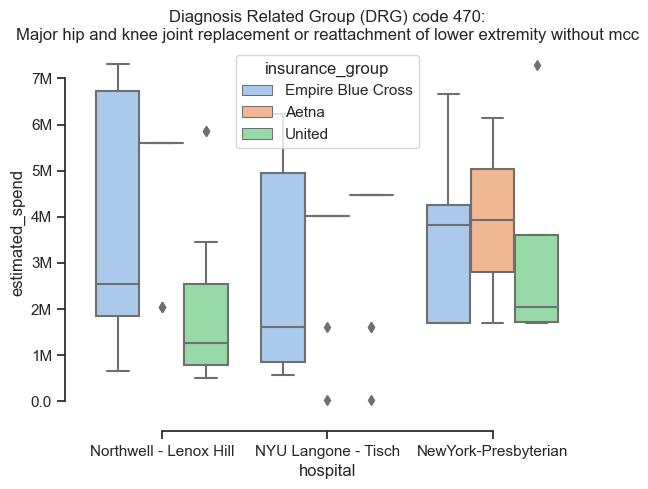

329
hospital                insurance_group  
NYU Langone - Tisch     Empire Blue Cross    52
                        Medicare             31
                        United               15
                        Aetna                12
                        Medicaid              1
NewYork-Presbyterian    Medicaid              7
                        Medicare              6
                        Empire Blue Cross     5
                        United                4
                        Aetna                 2
Northwell - Lenox Hill  Empire Blue Cross    33
                        Aetna                24
                        Medicare              9
                        United                4
                        Medicaid              1
Name: insurance_group, dtype: int64


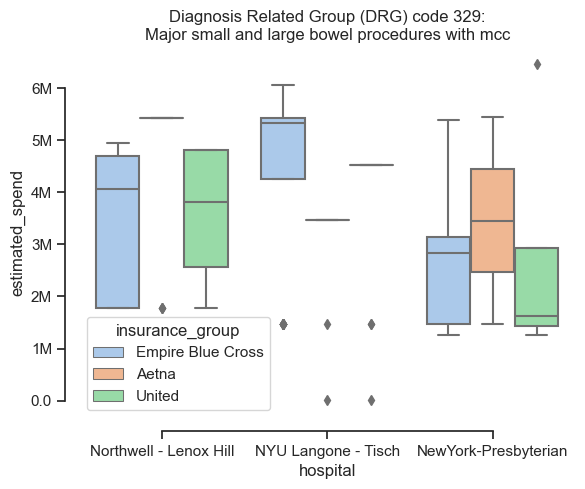

025
219
hospital                insurance_group  
NYU Langone - Tisch     Empire Blue Cross    52
                        Medicare             31
                        United               15
                        Aetna                12
                        Medicaid              1
NewYork-Presbyterian    Medicaid              7
                        Medicare              6
                        Empire Blue Cross     5
                        United                4
                        Aetna                 2
Northwell - Lenox Hill  Empire Blue Cross    33
                        Aetna                24
                        Medicare              9
                        United                4
                        Medicaid              1
Name: insurance_group, dtype: int64


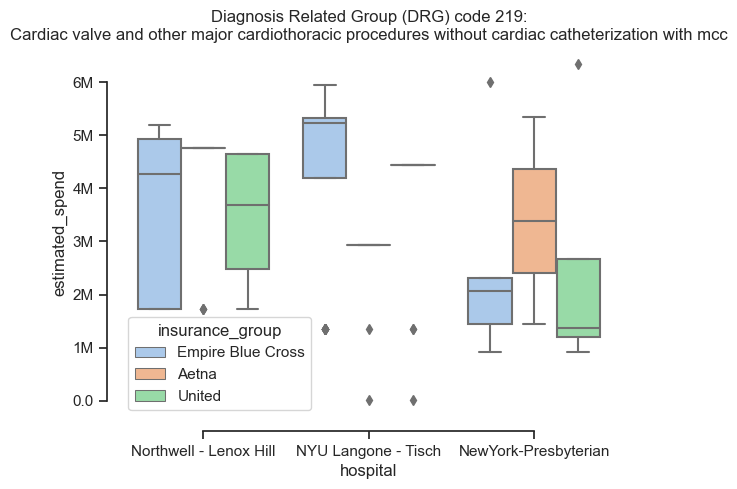

790
hospital                insurance_group  
NYU Langone - Tisch     Empire Blue Cross    52
                        Medicare             31
                        United               15
                        Aetna                12
                        Medicaid              1
NewYork-Presbyterian    Medicaid              7
                        Medicare              6
                        Empire Blue Cross     5
                        United                4
                        Aetna                 2
Northwell - Lenox Hill  Empire Blue Cross    33
                        Aetna                24
                        Medicare              9
                        United                4
                        Medicaid              1
Name: insurance_group, dtype: int64


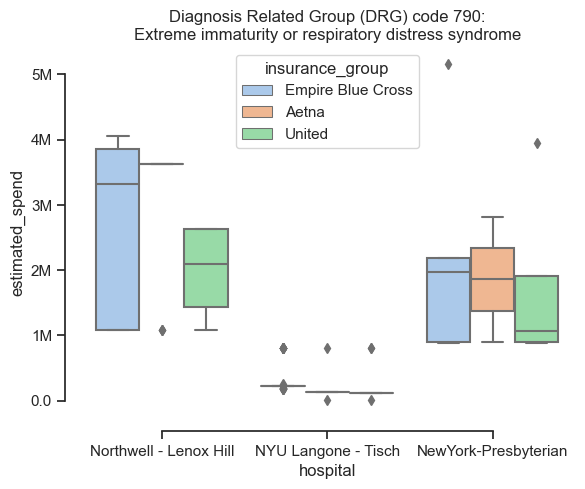

788
hospital                insurance_group  
NYU Langone - Tisch     Empire Blue Cross    52
                        Medicare             31
                        United               15
                        Aetna                12
                        Medicaid              1
NewYork-Presbyterian    Medicaid              7
                        Medicare              6
                        Empire Blue Cross     5
                        United                4
                        Aetna                 2
Northwell - Lenox Hill  Empire Blue Cross    33
                        Aetna                24
                        Medicare              9
                        United                4
                        Medicaid              1
Name: insurance_group, dtype: int64


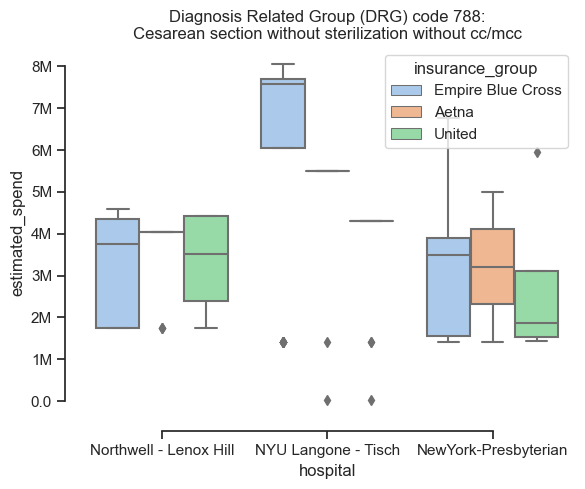

246
hospital                insurance_group  
NYU Langone - Tisch     Empire Blue Cross    136
                        Medicaid              49
                        Medicare              31
                        United                15
                        Aetna                 12
NewYork-Presbyterian    Medicaid               7
                        Medicare               6
                        Empire Blue Cross      5
                        United                 4
                        Aetna                  2
Northwell - Lenox Hill  Empire Blue Cross     53
                        Aetna                 24
                        Medicaid              21
                        United                16
                        Medicare               9
Name: insurance_group, dtype: int64


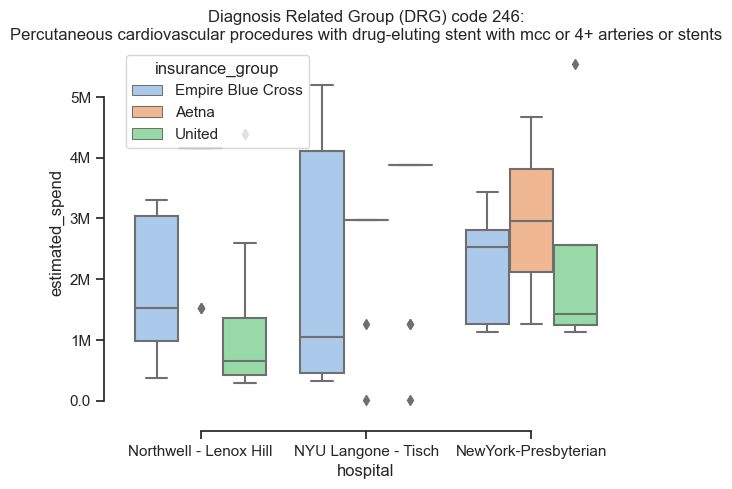

291
hospital                insurance_group  
NYU Langone - Tisch     Empire Blue Cross    52
                        Medicare             31
                        United               15
                        Aetna                12
                        Medicaid              1
NewYork-Presbyterian    Medicaid              7
                        Medicare              6
                        Empire Blue Cross     5
                        United                4
                        Aetna                 2
Northwell - Lenox Hill  Empire Blue Cross    33
                        Aetna                24
                        Medicare              9
                        United                4
                        Medicaid              1
Name: insurance_group, dtype: int64


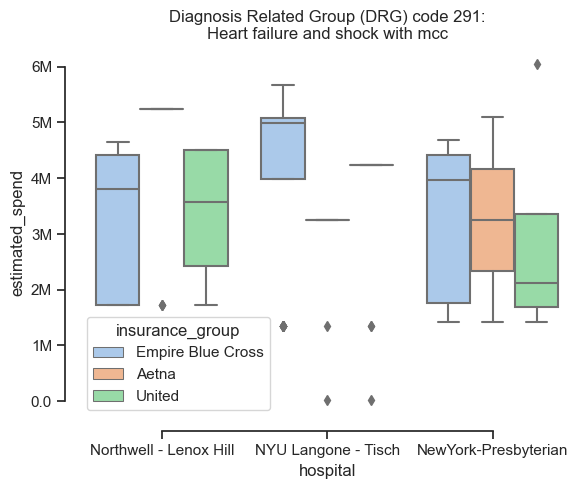

330
hospital                insurance_group  
NYU Langone - Tisch     Empire Blue Cross    52
                        Medicare             31
                        United               15
                        Aetna                12
                        Medicaid              1
NewYork-Presbyterian    Medicaid              7
                        Medicare              6
                        Empire Blue Cross     5
                        United                4
                        Aetna                 2
Northwell - Lenox Hill  Empire Blue Cross    33
                        Aetna                24
                        Medicare              9
                        United                4
                        Medicaid              1
Name: insurance_group, dtype: int64


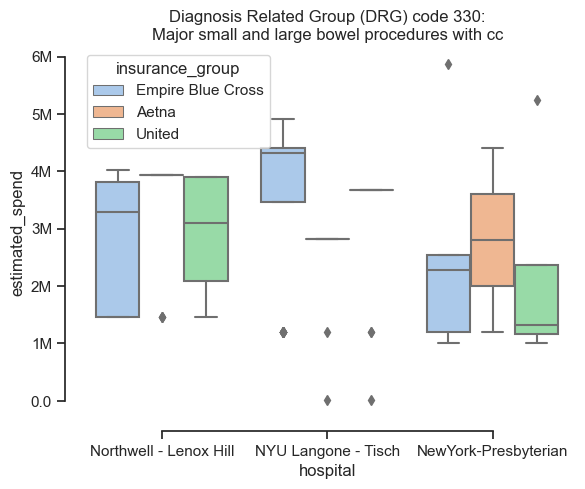

460
hospital                insurance_group  
NYU Langone - Tisch     Empire Blue Cross    52
                        Medicare             31
                        United               15
                        Aetna                12
                        Medicaid              1
NewYork-Presbyterian    Medicaid              7
                        Medicare              6
                        Empire Blue Cross     5
                        United                4
                        Aetna                 2
Northwell - Lenox Hill  Empire Blue Cross    53
                        Aetna                24
                        Medicaid             21
                        United               16
                        Medicare              9
Name: insurance_group, dtype: int64


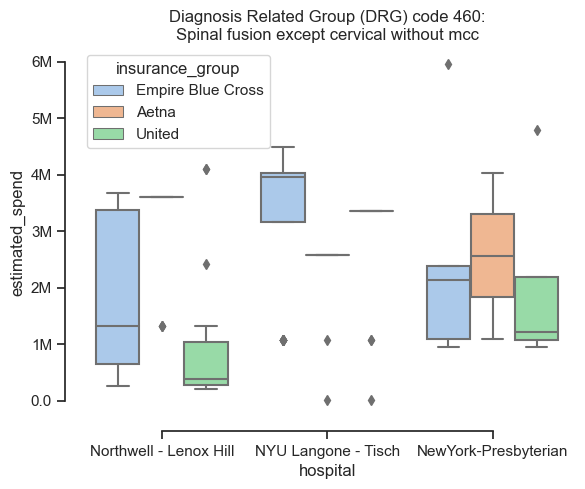

897
hospital                insurance_group  
NYU Langone - Tisch     Empire Blue Cross    52
                        Medicare             31
                        United               15
                        Aetna                12
                        Medicaid              1
NewYork-Presbyterian    Medicaid              7
                        Medicare              6
                        Empire Blue Cross     5
                        United                4
                        Aetna                 2
Northwell - Lenox Hill  Empire Blue Cross    33
                        Aetna                24
                        Medicare              9
                        United                4
                        Medicaid              1
Name: insurance_group, dtype: int64


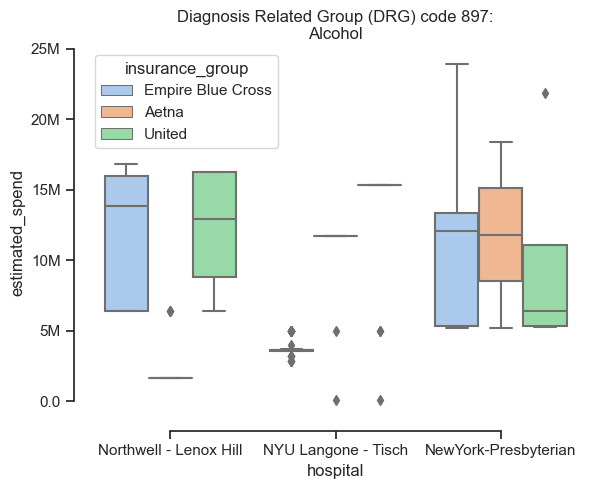

787
hospital                insurance_group  
NYU Langone - Tisch     Empire Blue Cross    52
                        Medicare             31
                        United               15
                        Aetna                12
                        Medicaid              1
NewYork-Presbyterian    Medicaid              7
                        Medicare              6
                        Empire Blue Cross     5
                        United                4
                        Aetna                 2
Northwell - Lenox Hill  Empire Blue Cross    33
                        Aetna                24
                        Medicare              9
                        United                4
                        Medicaid              1
Name: insurance_group, dtype: int64


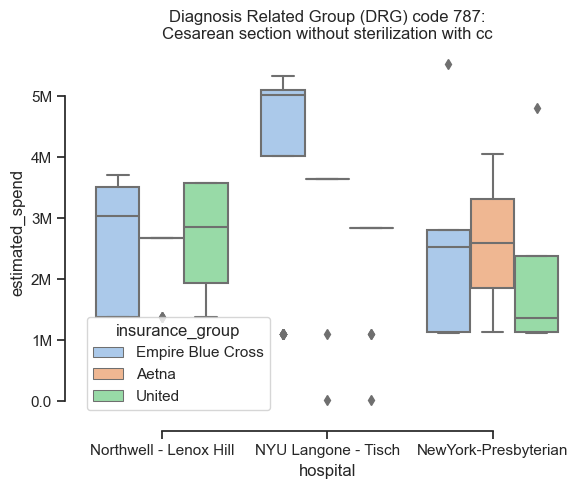

023
392
hospital                insurance_group  
NYU Langone - Tisch     Empire Blue Cross    52
                        Medicare             31
                        United               15
                        Aetna                12
                        Medicaid              1
NewYork-Presbyterian    Medicaid              7
                        Medicare              6
                        Empire Blue Cross     5
                        United                4
                        Aetna                 2
Northwell - Lenox Hill  Empire Blue Cross    33
                        Aetna                24
                        Medicare              9
                        United                4
                        Medicaid              1
Name: insurance_group, dtype: int64


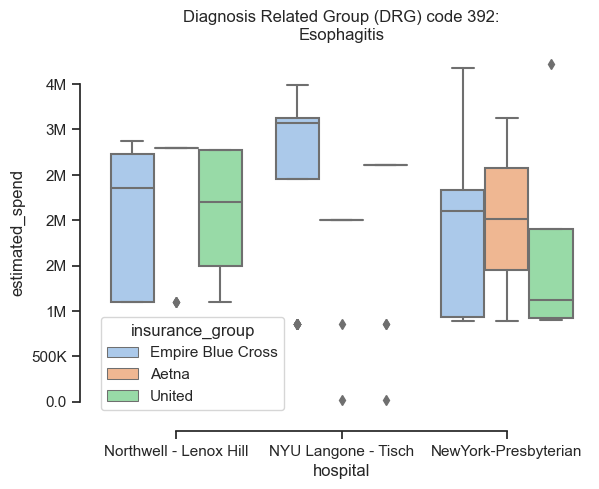

270
hospital                insurance_group  
NYU Langone - Tisch     Empire Blue Cross    52
                        Medicare             31
                        United               15
                        Aetna                12
                        Medicaid              1
NewYork-Presbyterian    Medicaid              7
                        Medicare              6
                        Empire Blue Cross     5
                        United                4
                        Aetna                 2
Northwell - Lenox Hill  Empire Blue Cross    33
                        Aetna                24
                        Medicare              9
                        United                4
                        Medicaid              1
Name: insurance_group, dtype: int64


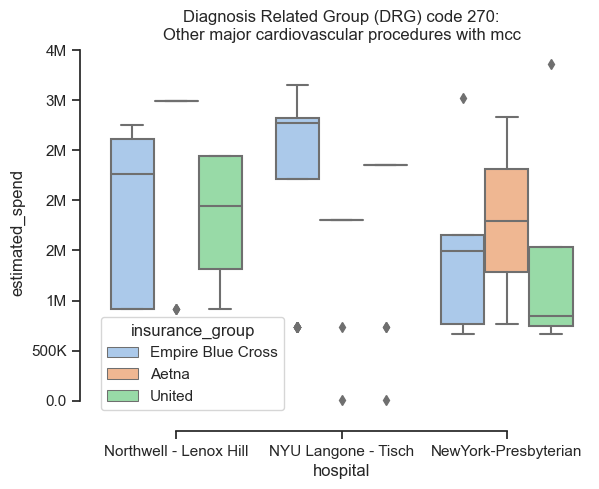

872
hospital                insurance_group  
NYU Langone - Tisch     Empire Blue Cross    52
                        Medicare             31
                        United               15
                        Aetna                12
                        Medicaid              1
NewYork-Presbyterian    Medicaid              7
                        Medicare              6
                        Empire Blue Cross     5
                        United                4
                        Aetna                 2
Northwell - Lenox Hill  Empire Blue Cross    33
                        Aetna                24
                        Medicare              9
                        United                4
                        Medicaid              1
Name: insurance_group, dtype: int64


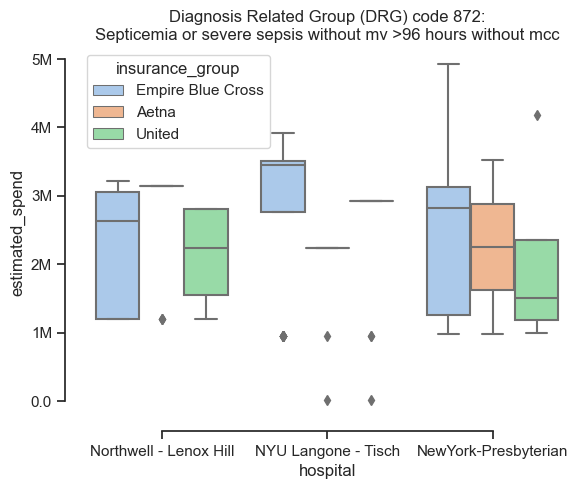

454
hospital                insurance_group  
NYU Langone - Tisch     Empire Blue Cross    52
                        Medicare             31
                        United               15
                        Aetna                12
                        Medicaid              1
NewYork-Presbyterian    Medicaid              7
                        Medicare              6
                        Empire Blue Cross     5
                        United                4
                        Aetna                 2
Northwell - Lenox Hill  Empire Blue Cross    33
                        Aetna                24
                        Medicare              9
                        United                4
                        Medicaid              1
Name: insurance_group, dtype: int64


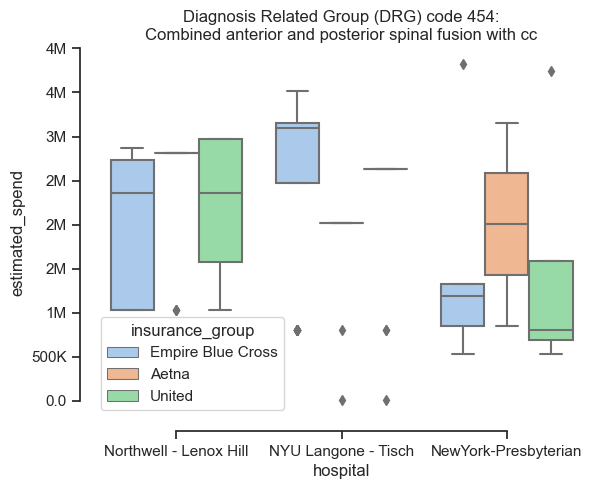

In [35]:
for billing_code in df_top_drg_codes_cost['billing_code']:
    print(billing_code)
    if billing_code in df['billing_code'].values:
      print(df[df['billing_code'] == billing_code].groupby('hospital').insurance_group.value_counts())
      sns.boxplot(x="hospital", y="estimated_spend",
            hue="insurance_group", 
            hue_order=["Empire Blue Cross", "Aetna", "United"],
            #palette=["m", "g"],
            data=df[df['billing_code'] == billing_code]).set(title=f"Diagnosis Related Group (DRG) code {billing_code}:\n{billing_code_to_description[billing_code].split(',')[0].lower().capitalize()}")
      sns.despine(offset=10, trim=True)
      # Apply the formatter to the x-axis
      plt.gca().yaxis.set_major_formatter(formatter)
      plt.show()